# Cell Data Segmentation
## Which classes exist? Are they (roughly) balanced?

In [5]:
from pandas import DataFrame
import pandas as pd

df = pd.read_csv('segmentation_data.csv')

""""
Calculate the class distribution ratio of a feature by using the feature with the least samples as the basis for the calculation
"""
def ratio(df: DataFrame, feature: str):
    g = df.groupby([feature]).size().to_frame(name = "samples")
    min_samples = g.iloc[:, 0].min()
    g['ratio'] = round(g.iloc[:, 0] / min_samples, 1)
    return g

ratio(df, "Class")

samples  ratio
Class                
PS        1300    1.8
WS         719    1.0

There are two different classes (`PS`, `WS`), they are not balanced with `PS` having `1300` instances and `WS` `719`. (imbalance of 1:1.8 when using `WS` as the base)

## Which noteworthy trends of features and relations between features aswell as features and Class do you see?

In [6]:
df.describe()

AngleCh1      AreaCh1  AvgIntenCh1  AvgIntenCh2  AvgIntenCh3  \
count  2019.000000  2019.000000  2019.000000  2019.000000  2019.000000   
mean     90.493405   320.336305   126.071679   189.052115    96.420171   
std      48.760000   214.023533   165.008379   158.956105    96.666924   
min       0.030876   150.000000    15.160400     1.000000     0.120000   
25%      53.892205   193.000000    35.364158    44.998570    33.495693   
50%      90.588770   253.000000    62.343173   173.506300    67.431250   
75%     126.682013   362.500000   143.187800   279.289704   127.341651   
max     179.939323  2186.000000  1418.634831   989.509800  1205.512000   

       AvgIntenCh4  ConvexHullAreaRatioCh1  ConvexHullPerimRatioCh1  \
count  2019.000000             2019.000000              2019.000000   
mean    140.701585                1.205859                 0.895764   
std     146.634665                0.202522                 0.076108   
min       0.563265                1.005831                 0.510623   
25%      40.679740                1.065236                 0.856972   
50%      90.250000                1.148620                 0.913262   
75%     191.170410                1.280514                 0.955606   
max     886.837500                2.900320                 0.996499   

       DiffIntenDensityCh1  FiberAlign2Ch3  IntenCoocMaxCh3  IntenCoocMaxCh4  \
count          2019.000000     2019.000000      2019.000000      2019.000000   
mean             72.660125        1.454076         0.231957         0.246709   
std              49.028338        0.252347         0.204030         0.183398   
min              25.760355        1.000000         0.014286         0.013423   
25%              43.532759        1.290022         0.051171         0.107596   
50%              55.810304        1.469231         0.179775         0.211886   
75%              79.909902        1.647809         0.353311         0.337116   
max             442.773196        2.000000         0.968326         0.940367   

       NeighborMinDistCh1  SkewIntenCh4  
count         2019.000000   2019.000000  
mean            29.691933      0.932515  
std             11.501550      0.885901  
min             10.083350     -1.004442  
25%             22.547068      0.403460  
50%             27.642860      0.728311  
75%             34.079173      1.225431  
max            126.993700      8.069013

#### scatterplot of all features:

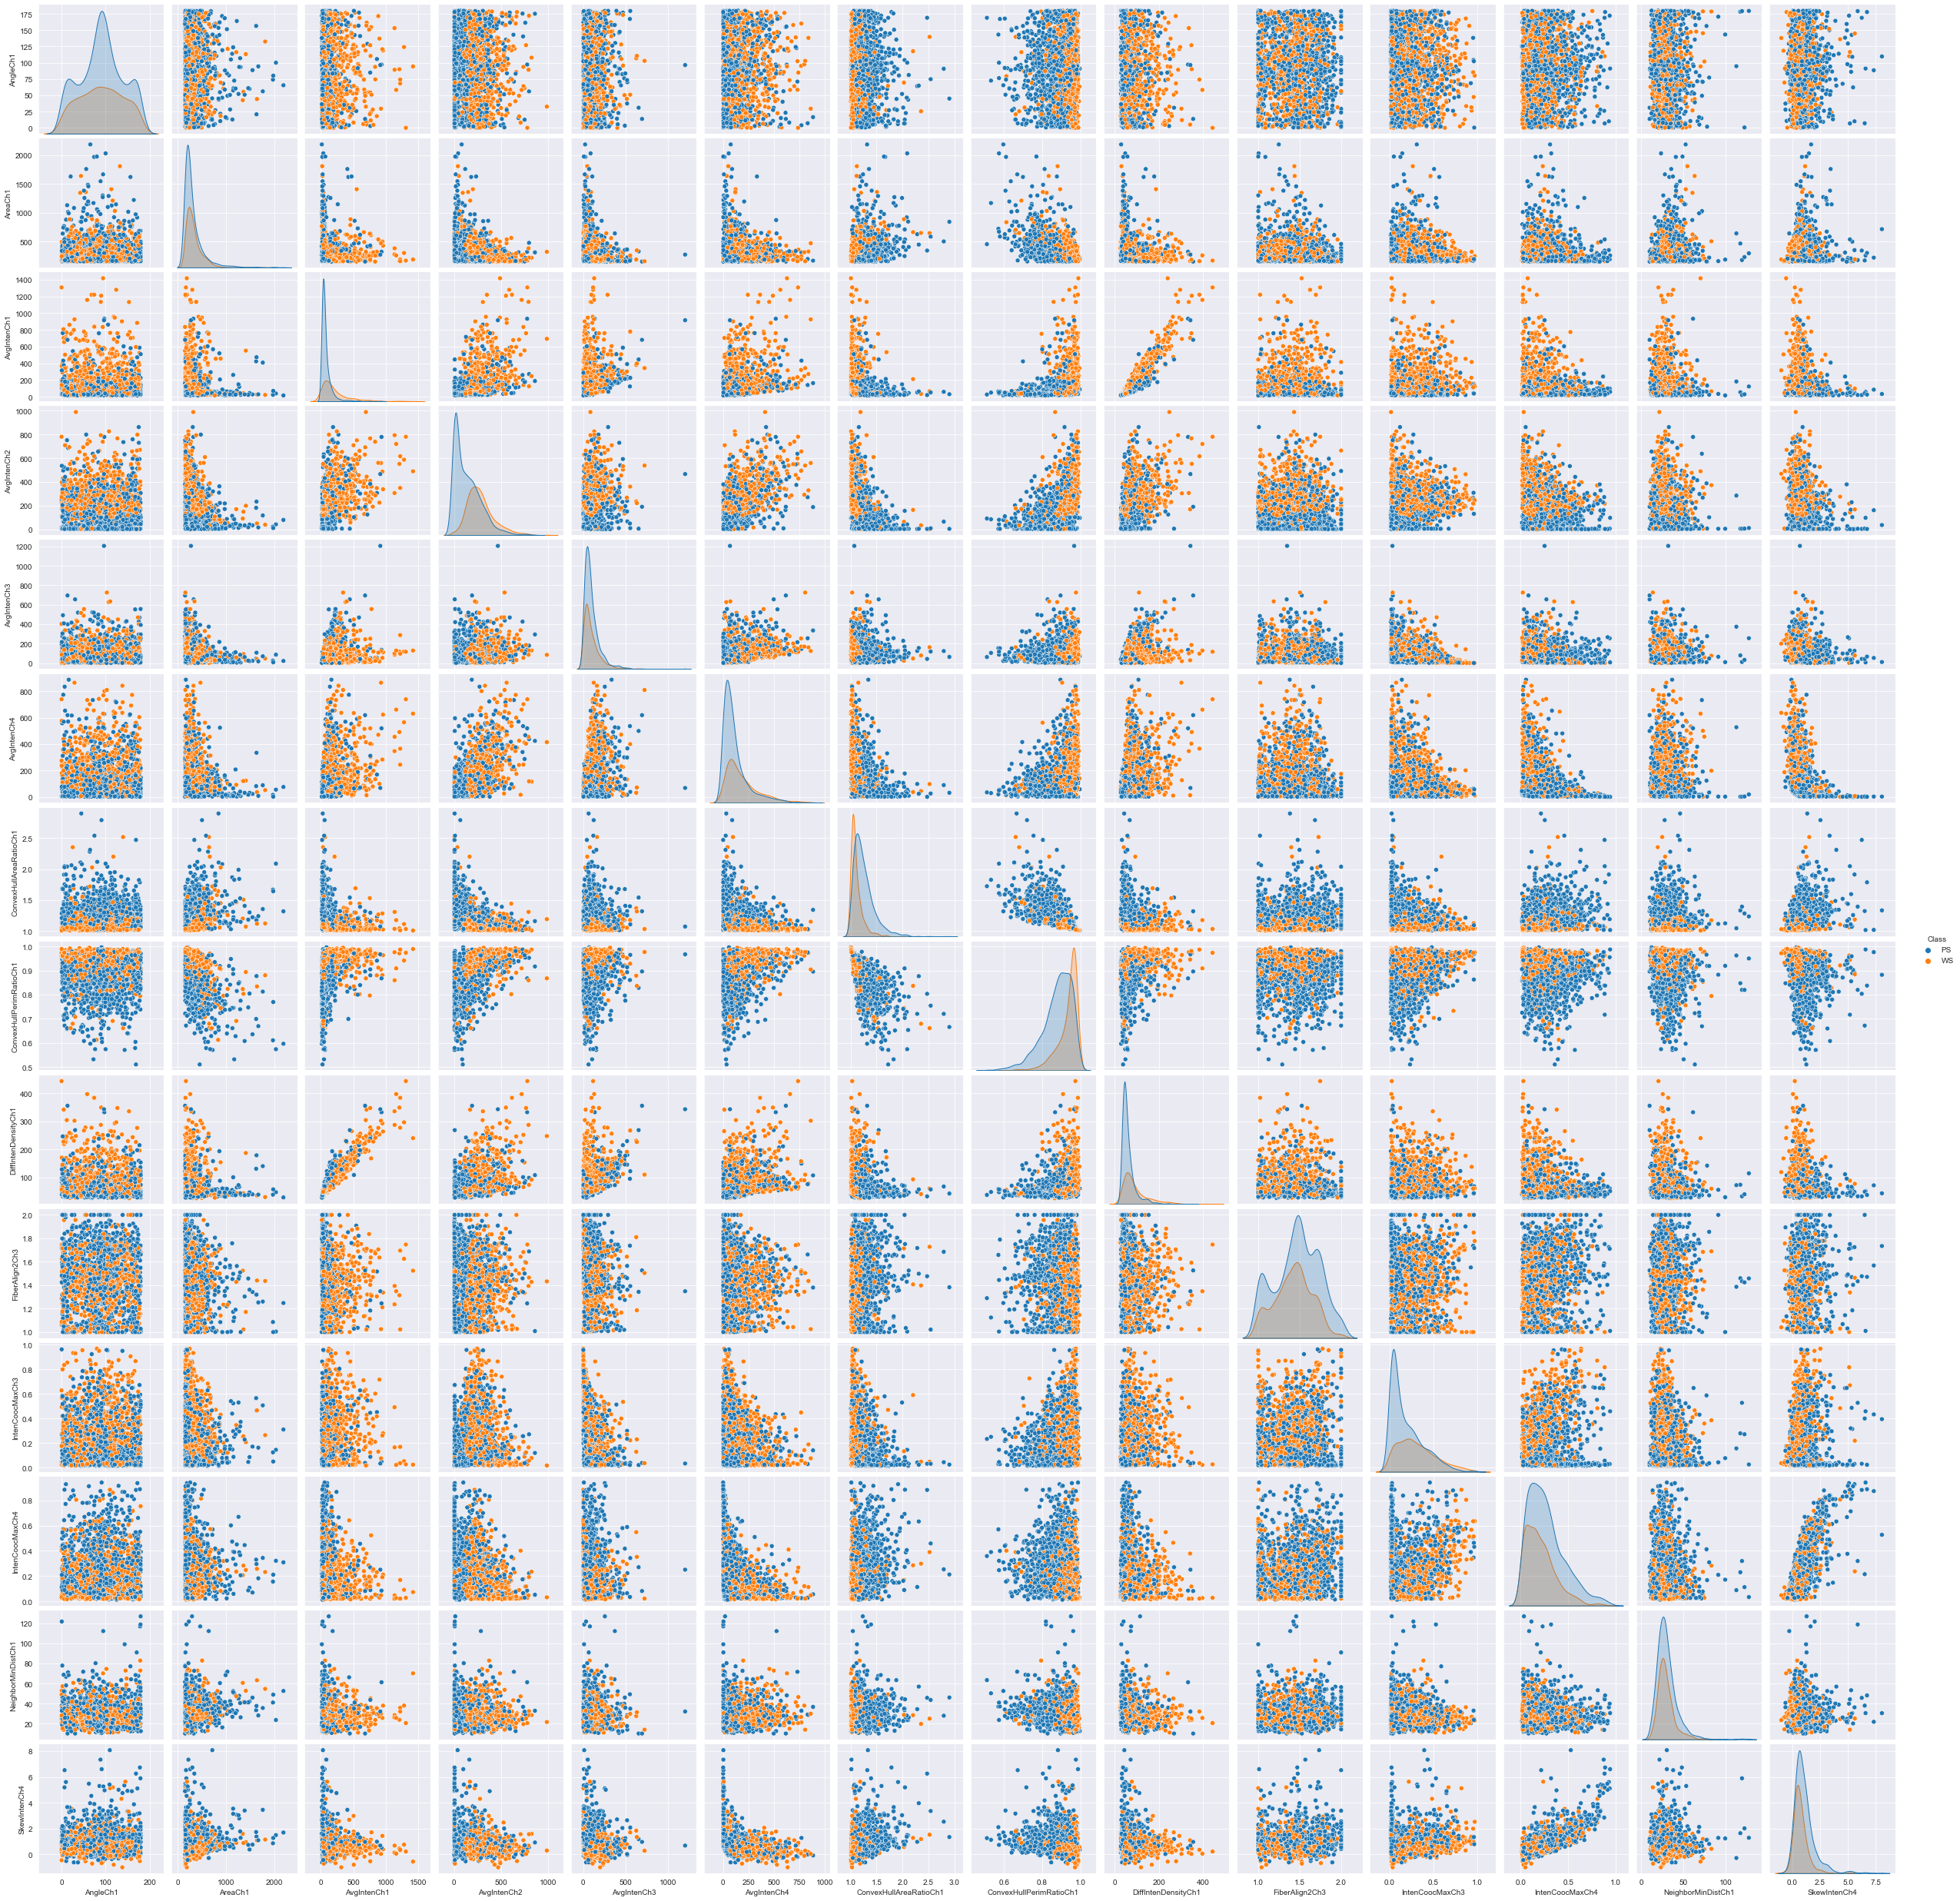

In [7]:
import seaborn as sns
sns.pairplot(df, hue="Class")

### correlation matrix:

In [8]:
df.corr(numeric_only=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

### correlation heatmap:

In [ ]:
# from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(numeric_only=True), fignum=f.number, cmap="PRGn")
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=75)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

The heatmap is a great tool to visualize the correlation matrix. From it, we can easily see, that the feature `DiffIntenDensityCh1` and the `AvgIntenCh1` have a correlation above 0.9 and that `ConvexHullPerimRatioCh1` and `ConvexHullAreaRatioCh1` have a high negative correlation < -0.7.

Some other features that have a decent correlation are `SkewIntenCh4` and `IntenCoocMaxCh4` with a correlation of ~ 0.71, as well as `AvgIntenCh2` and `AvgIntenCh4` with a correlation of ~ 0.59.

### plot the mentioned features:

In [ ]:
def lmplot_by_class(data, x, y):
    sns.lmplot(x=x, y=y, data=df, hue="Class", markers=[".", "."], fit_reg=True)

lmplot_by_class(x="DiffIntenDensityCh1", y="AvgIntenCh1", data=df)
lmplot_by_class(x="ConvexHullPerimRatioCh1", y="ConvexHullAreaRatioCh1", data=df)
lmplot_by_class(x="AvgIntenCh2", y="AvgIntenCh4", data=df)
lmplot_by_class(x="SkewIntenCh4", y="IntenCoocMaxCh4", data=df)  # did not manage to place them side by side as this is not supported by lmplot

### boxplots of the features scaled by log:

In [ ]:
df.plot.box(by='Class', figsize=(20, 15), logy=True, layout=(2, 7))

From these boxplots we take a closer look on the ones that have the least overlap.

In [ ]:
g = df.groupby(by="Class")
g[['AvgIntenCh1']].boxplot(figsize=(15, 10))

In [ ]:
g[['AvgIntenCh2']].boxplot(figsize=(15, 10))

In [ ]:
g[['DiffIntenDensityCh1']].boxplot(figsize=(15, 10))

In [ ]:
g[['ConvexHullPerimRatioCh1']].boxplot(figsize=(15, 10))

In [ ]:
g[['ConvexHullAreaRatioCh1']].boxplot(figsize=(15, 10))

## If you would need to distinguish the classes with those features, which features would you choose, any why?
The boxplots above show the features that can be used to differentiate between well segmented and poor segmented data entries.
- AvgIntenCh1
- AvgIntenCh2
- DiffIntenDensityCh1
- ConvexHullPerimRatioCh1
- ConvexHullAreaRatioCh1

The scatterplots also show that either `ConvexHullAreaRatioCh1` or `ConvexHullPerimRatioCh1` can be used with most other Features to get a somewhat decent separation between the 2 classes.

In retrospect: we were not sure if we should normalize and scale the data or not.